## 1. Importing dependencies and Data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the data recorded from the pressure ports

In [148]:
pressures = pd.read_csv('raw_testG41.csv')
pressures.columns
pressures.dtypes

  Run_nr    object
    Time    object
   Alpha    object
Delta_Pb    object
   P_bar    object
             ...  
    P109    object
    P110    object
    P111    object
    P112    object
    P113    object
Length: 121, dtype: object

Importing the coordinates of each static port on the airfoil

In [149]:
airfoil_ports = pd.read_csv('airfoil_coordinates.csv')
airfoil_ports.columns

Index(['Port Name', 'x', 'y'], dtype='object')

## 2. Processing to floats

In [150]:
pressures = pressures.drop(labels=0)

In [151]:
pressures.columns = pressures.columns.str.strip(' ')
pressures.columns

Index(['Run_nr', 'Time', 'Alpha', 'Delta_Pb', 'P_bar', 'T', 'rpm', 'rho',
       'P001', 'P002',
       ...
       'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112',
       'P113'],
      dtype='object', length=121)

In [152]:
pressures = pressures.drop(labels= ['Time', 'Run_nr'], axis=1)

In [153]:
pressures = pressures.astype(float)

## 3. Transform from pressure distribution to dimensionless coefficient $C_p \: [-]$

In [154]:
pressures['q_inf'] = 0.211804 + 1.928442*pressures['Delta_Pb'] + 1.879374 *10**(-4) * (pressures['Delta_Pb'])**2 # in pascal

In [155]:
pressures.loc[:, 'P001':'P113'] = (pressures.loc[:, 'P001':'P113']).add(pressures.loc[:, 'P_bar'] * 1e2, axis=0)

In [156]:
pressures['p_s'] = pressures['P097'] - pressures['q_inf']

In [157]:
cp_distributions = pressures.copy()

cp_distributions.loc[:, 'P001':'P049'] = ((pressures.loc[:, 'P001':'P049']).subtract(pressures.loc[:, 'p_s'], axis=0)).div(pressures.loc[:, 'q_inf'], axis = 0)

In [158]:
cp_distributions.head()

cp_distributions.to_csv('processed_cp.csv')

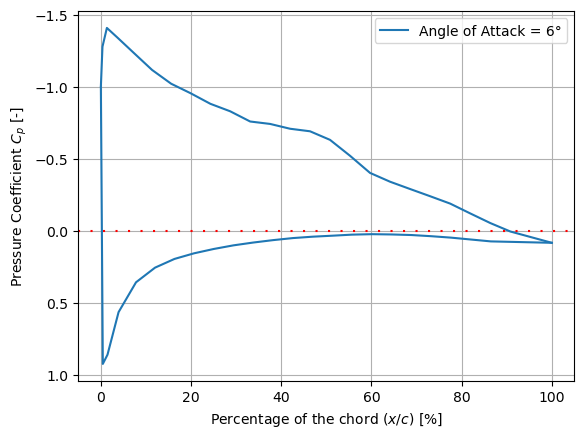

In [160]:
# select your angle of attack!

aoa = 6 

if aoa in pressures['Alpha'].values:
    temp = cp_distributions[cp_distributions['Alpha'] == aoa].copy(deep=True).reset_index()
else: 
    raise Exception('This angle of attack was not measured during the test or the number is inserted incorrectly')

colors = ['tab:blue', 'tab:orange']

for i in range(len(temp)):
    upper = temp.loc[i, 'P001':'P025'].to_numpy().flatten()
    lower = temp.loc[i, 'P026':'P049'].to_numpy().flatten()

    plt.plot(airfoil_ports['x'][0:25], upper, color= colors[i], label=f'Angle of Attack = {aoa}°')
    plt.plot(airfoil_ports['x'][25:49], lower, color= colors[i])
    
plt.axhline(0.0, linestyle=(0, (1, 5)), color='red')
plt.grid()
plt.xlabel('Percentage of the chord $(x/c)$ [%]')
plt.ylabel(r'Pressure Coefficient $C_p$ [-]')
plt.gca().invert_yaxis()

plt.legend()
plt.show()